In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [2]:
cokacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col=0, parse_dates=True)
cokacola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [3]:
cokacola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [5]:
# Visualizations
cokacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
cokacola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [6]:
cokacola.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

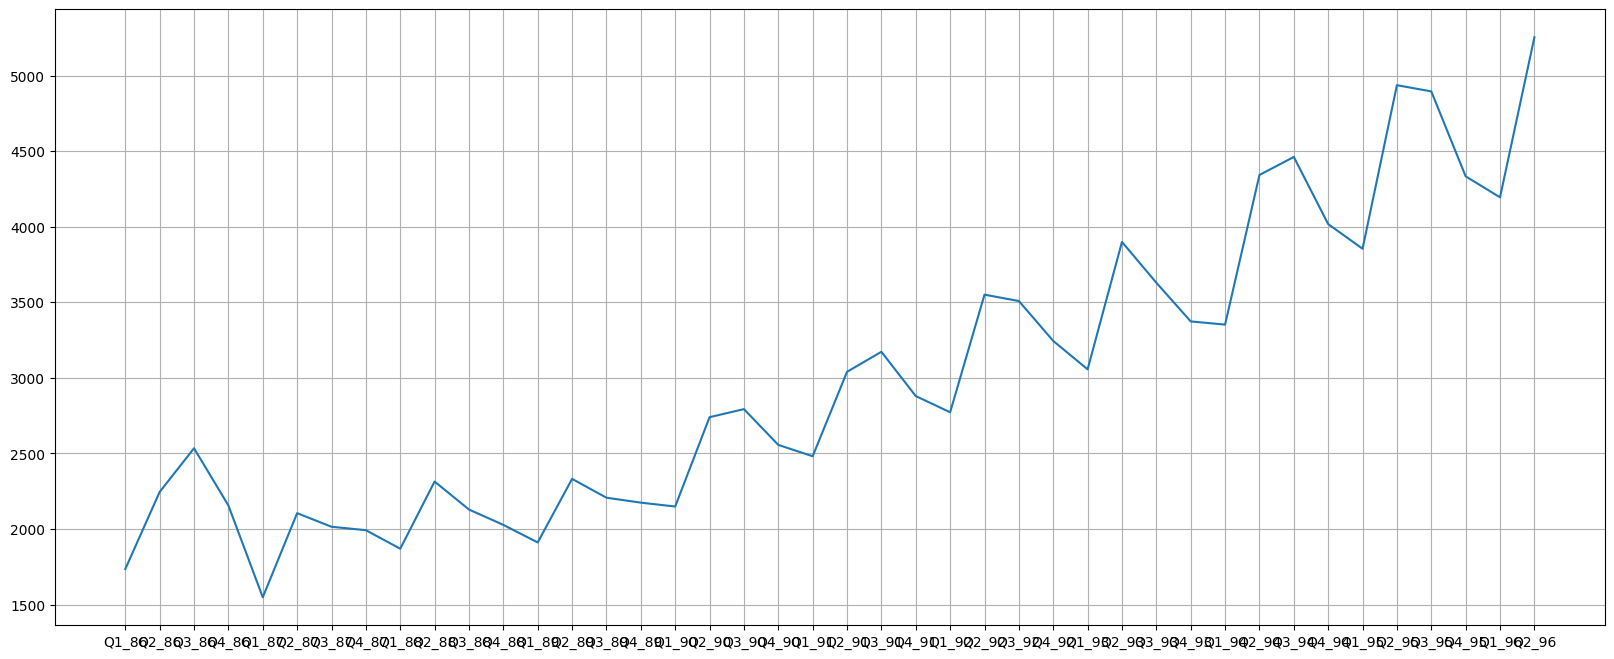

In [7]:
plt.figure(figsize = (20,8))
plt.plot(cokacola)
plt.grid(True)
plt.show()

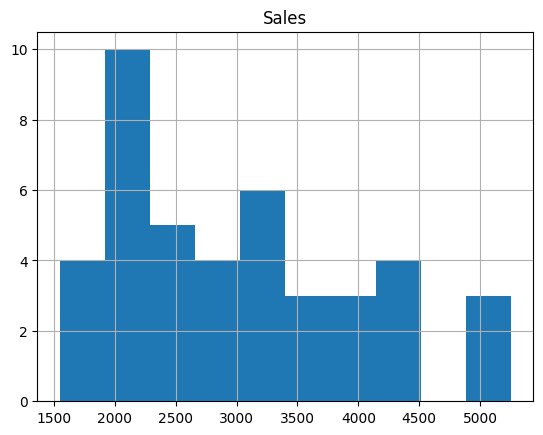

In [8]:
# Histogram and Density Plots
# create a histogram plot
cokacola.hist()
plt.show()

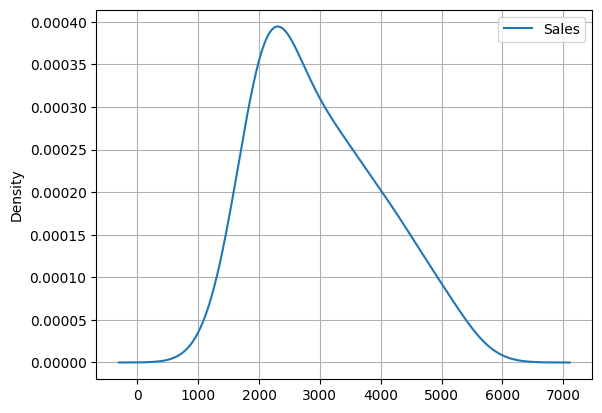

In [9]:
# create a density plot
cokacola.plot(kind='kde')
plt.grid(True)
plt.show()

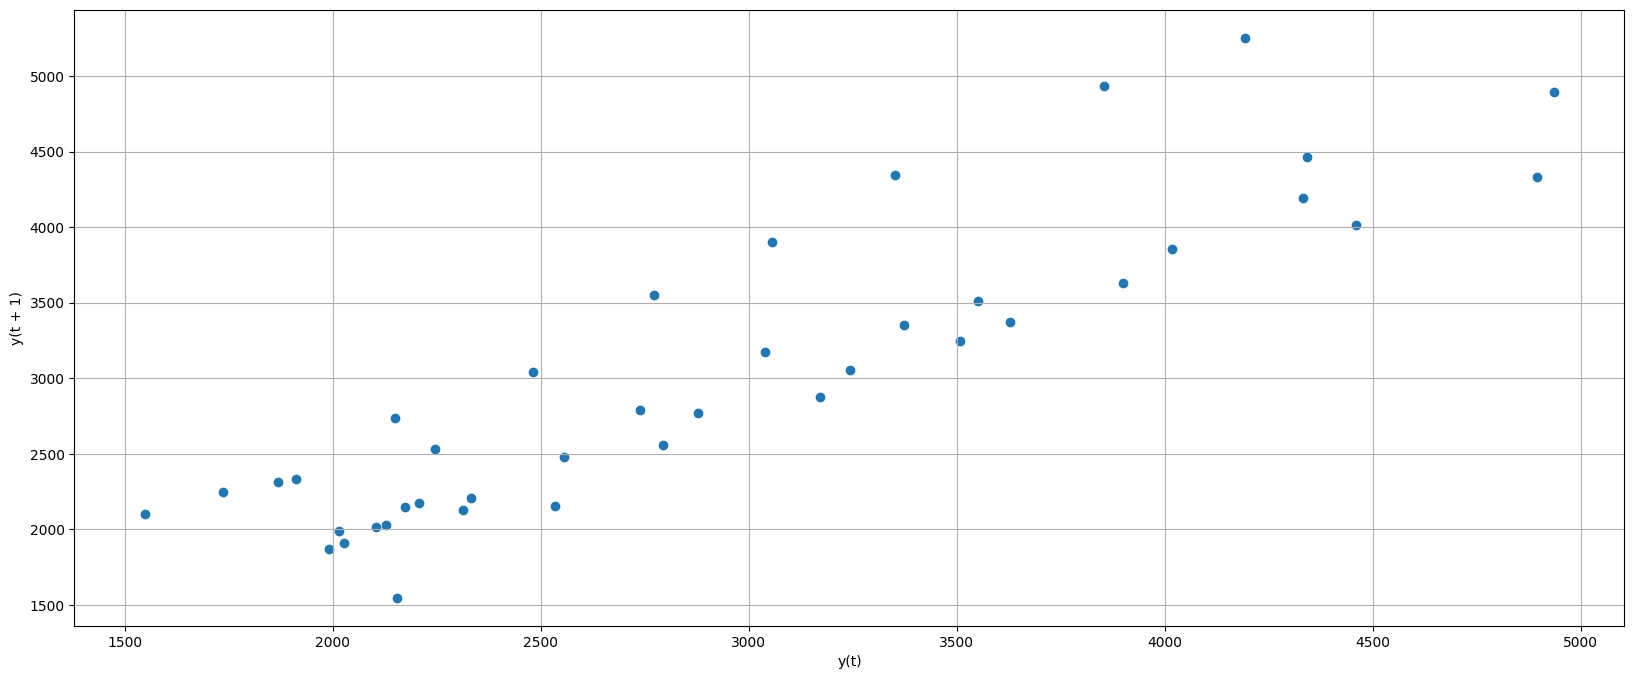

In [10]:
# Lag plot
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(cokacola)
plt.grid(True)
plt.show()

<Figure size 4000x1000 with 0 Axes>

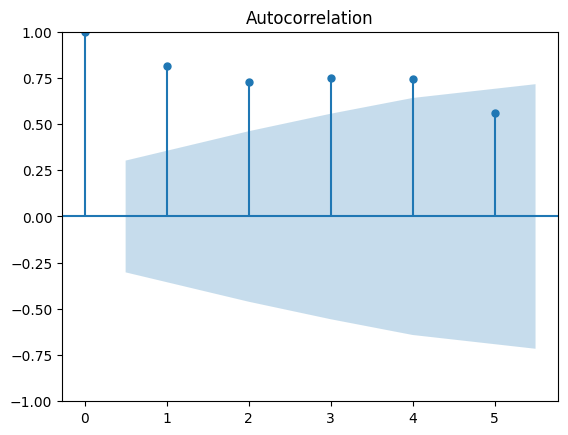

In [11]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(cokacola, lags=5)
plt.show()

In [14]:
# Box and Whisker Plots by Interval
cokacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
cokacola.head()

<ipython-input-14-e689078a0920>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  cokacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

In [15]:
type(cokacola)

pandas.core.series.Series

In [17]:
# Sampling and Basic Transformations
cokacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
cokacola.head()

<ipython-input-17-884ce1804948>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  cokacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

In [18]:
cokacola.shape

(42,)

In [24]:
cokacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [25]:
quarter =['Q1','Q2','Q3','Q4']

In [26]:
p = cokacola["Quarter"][0]
p[0:2]
cokacola['quarter']= 0

for i in range(42):
    p = cokacola["Quarter"][i]
    cokacola['quarter'][i]= p[0:2]

cokacola

<ipython-input-26-1210a50127a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cokacola['quarter'][i]= p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [27]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cokacola['quarter']))
quarter_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [28]:
cokacola=pd.concat([cokacola,quarter_dummies],axis=1)
cokacola.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [29]:
# Complete the dataset
cokacola['t']=np.arange(1,43)
cokacola['t_square']=np.square(cokacola.t)
cokacola['log_Sales']=np.log(cokacola.Sales)
cokacola

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [30]:
# Forecasting - Model Based Methods
cokacola

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


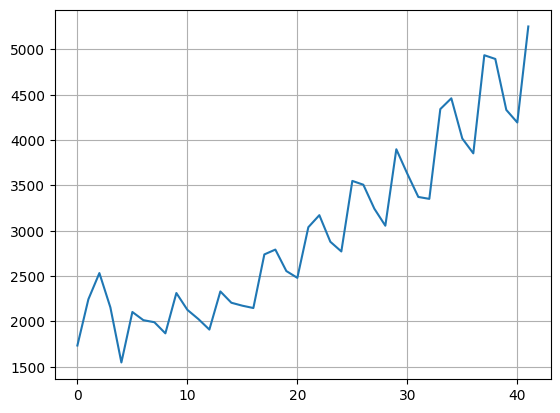

In [31]:
cokacola['Sales'].plot()
plt.grid(True)
plt.show()

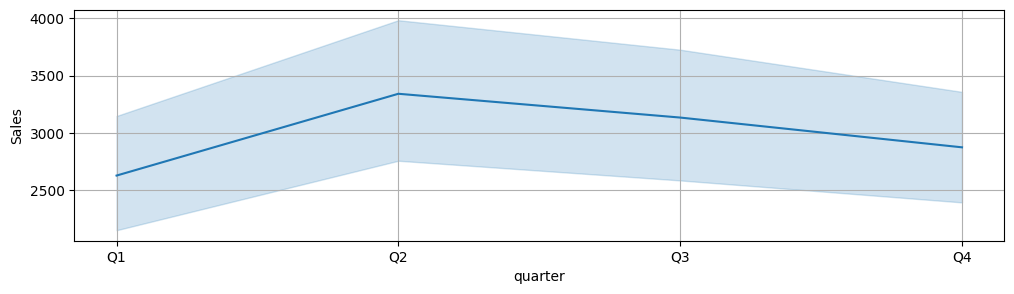

In [32]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=cokacola)
plt.grid(True)
plt.show()

In [33]:
# Splitting data
cokacola

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [34]:
# For self understanding of forecasting values data split into multiples of 12
Train = cokacola.head(35)
Test = cokacola.tail(7)

In [35]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [36]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [37]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351143

In [38]:
#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.34864848421216

In [39]:
#Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.811731941759

In [40]:
#Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251737

In [41]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.46413951634946

In [42]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351966077

In [43]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

339.1874666994819

In [44]:
#Multiplicative Seasonality Quadratic
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.62473844014

In [45]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


In [46]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=cokacola).fit()

In [47]:
pred_new  = pd.Series(model_full.predict(cokacola))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [48]:
cokacola["forecasted_Sales"] = pd.Series(np.exp(pred_new))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


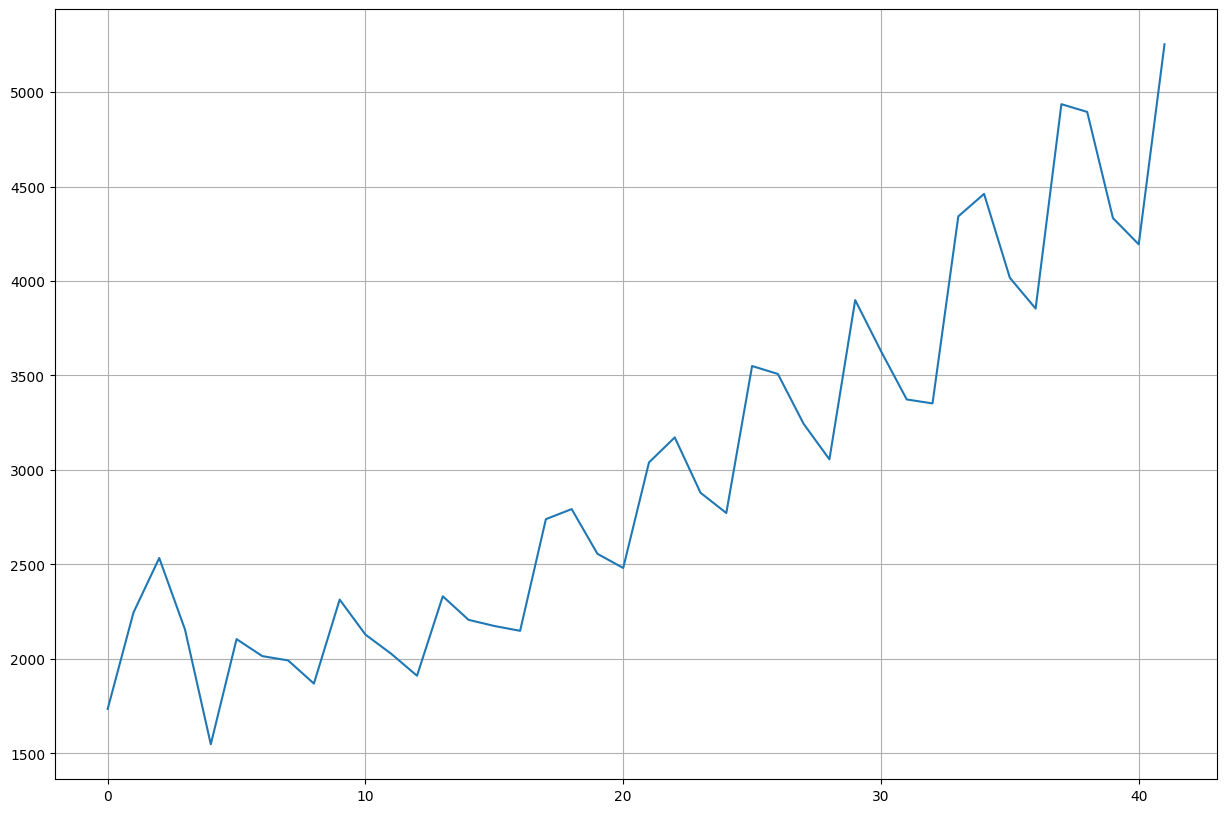

In [49]:
plt.figure(figsize=(15,10))
plt.plot(cokacola[['Sales','forecasted_Sales']].reset_index(drop=True))
plt.grid(True)
plt.show()

In [50]:
# Splitting data
Train = cokacola.head(35)
Test = cokacola.tail(7)

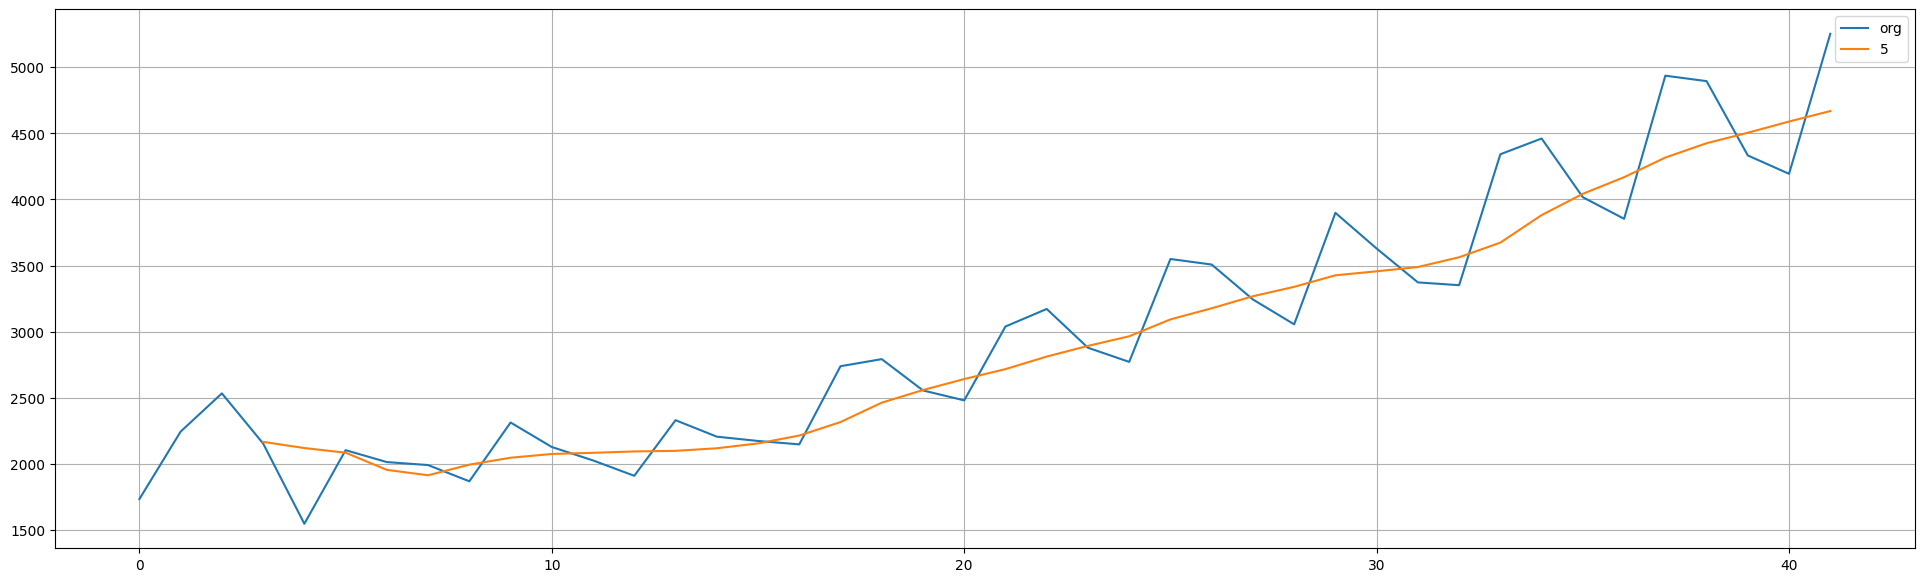

In [51]:
# Moving Average
plt.figure(figsize=(24,7))
cokacola['Sales'].plot(label="org")
cokacola["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')
plt.grid(True)
plt.show()

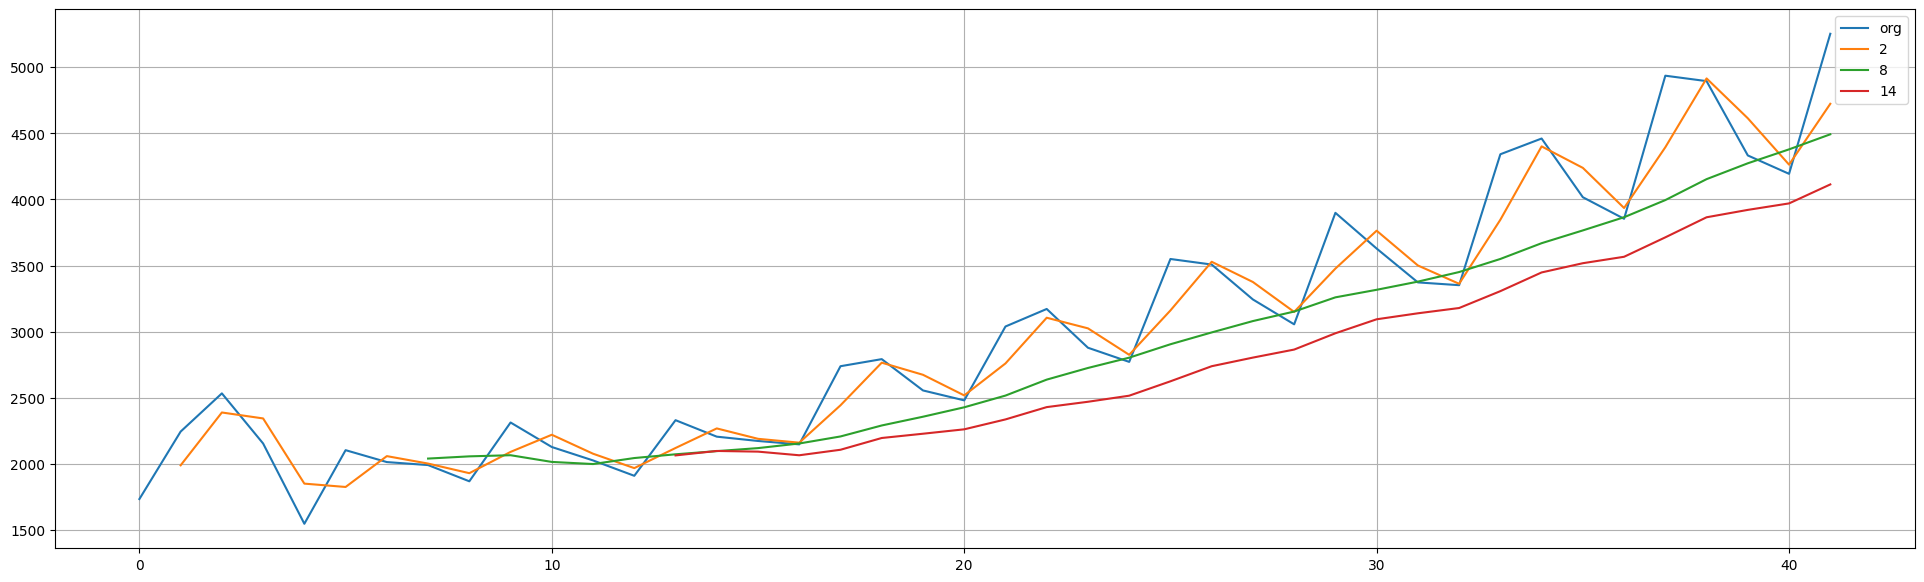

In [52]:
plt.figure(figsize=(24,7))
cokacola['Sales'].plot(label="org")
for i in range(2,18,6):
    cokacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.grid(True)
plt.show()

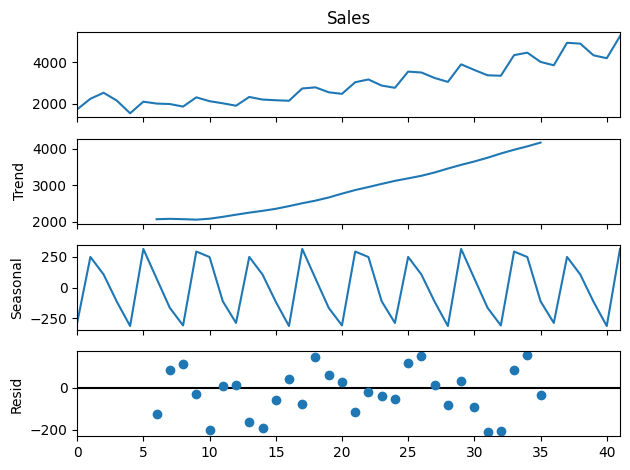

In [53]:
# Time series decomposition plot
decompose_ts_add = seasonal_decompose(cokacola['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

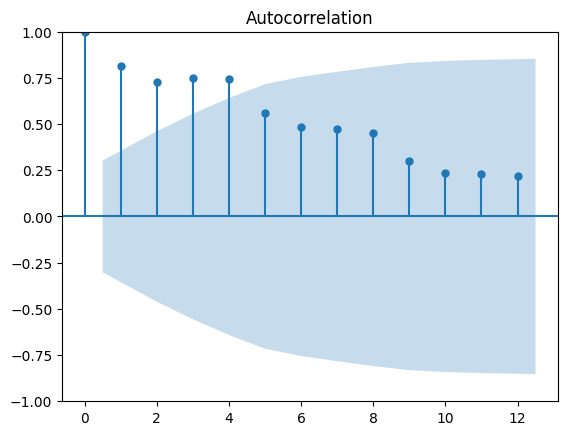

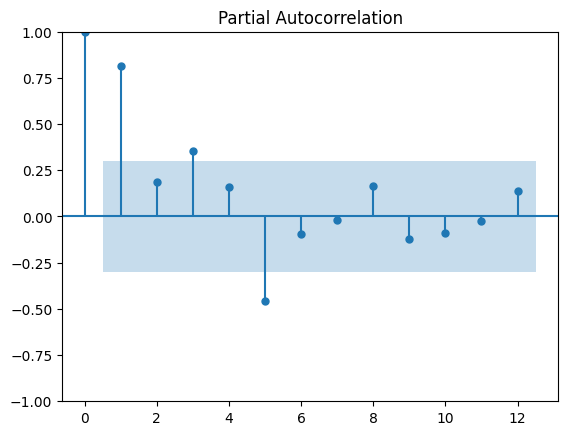

In [54]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cokacola.Sales,lags=12)
tsa_plots.plot_pacf(cokacola.Sales,lags=12)
plt.show()

In [55]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [56]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


16.404922356416872

In [57]:
# Holt method
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

<ipython-input-57-01c2a6e18c10>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


15.901867072128256

In [58]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.241832544936149

In [59]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.692103335212899

In [60]:
# Final Model by combining train and test
hwe_model_mul_add = ExponentialSmoothing(cokacola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [61]:
#Forecasting for next 7 time periods
hwe_model_mul_add.forecast(7)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
dtype: float64

# Comparing above models the Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error i.e 2.52